In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Iris Dataset.........................
from sklearn.datasets import load_iris
dataset=load_iris()

<h3> <i> EDA Steps ................... </h3>

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#  Creating a DataFrame.......
iris_data_complete=pd.DataFrame(dataset['data'],columns=[i.replace(" (cm)",'').strip().replace(' ','_') for i in dataset['feature_names']])
iris_data_complete['species_label']=dataset['target']
species=[]
for i in dataset['target']:
        species.append(dataset['target_names'][i])
iris_data_complete['species']=species
iris_data_complete.head()

,sepal_length,sepal_width,petal_length,petal_width,species_label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
#  Complete Avaiable Dataset............
iris_data_complete.shape

(150, 6)

In [7]:
#  Check if dataset is balanced or not...................
iris_data_complete['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### 1-D Scatter Plot

<h3> Disadavantages of 1-D Scatter Plot </h3>
It is very hard to make sense of the data, as it overlaps a lot (don't now the number of points)

In [8]:
iris_data_plot=iris_data_complete.copy()
del iris_data_plot['species_label']

In [9]:
iris_setosa=iris_data_complete.loc[iris_data_complete['species']=='setosa']
iris_verginica=iris_data_complete.loc[iris_data_complete['species']=='virginica']
iris_versicolor=iris_data_complete.loc[iris_data_complete['species']=='versicolor']

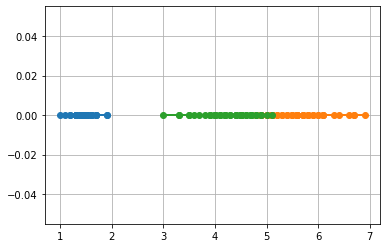

In [10]:
plt.plot(iris_setosa['petal_length'], np.zeros_like(iris_setosa['petal_length']), marker="o")
plt.plot(iris_verginica['petal_length'], np.zeros_like(iris_verginica['petal_length']), marker="o")
plt.plot(iris_versicolor['petal_length'], np.zeros_like(iris_versicolor['petal_length']), marker="o")
plt.grid()
plt.show()


### Better Way to Visualize 1-D data or univariate analysis
<h5> <i> Univariate Analysis is the process of analysing single feature </i></h5>

c:\Users\vedaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\vedaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\vedaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

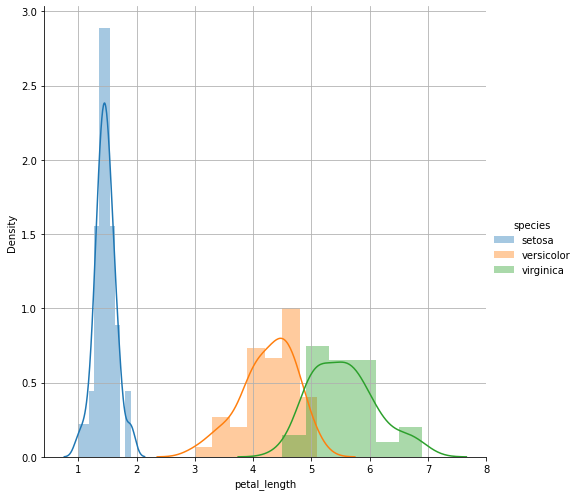

In [11]:
sns.FacetGrid(iris_data_plot, hue="species", height=7).map(sns.distplot, "petal_length").add_legend()
plt.grid()
plt.show()

### EDA Analysis from the distribution plot
Here based on petal length we can clearly see if petal_length<=2, the flower is setosa 

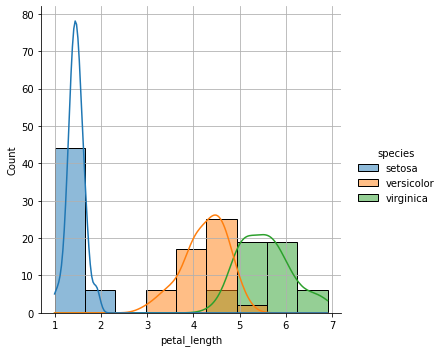

In [12]:
# this is also known as density plots
sns.displot(iris_data_plot, x="petal_length", hue="species", kde=True)
plt.grid()


### Distributions of all features

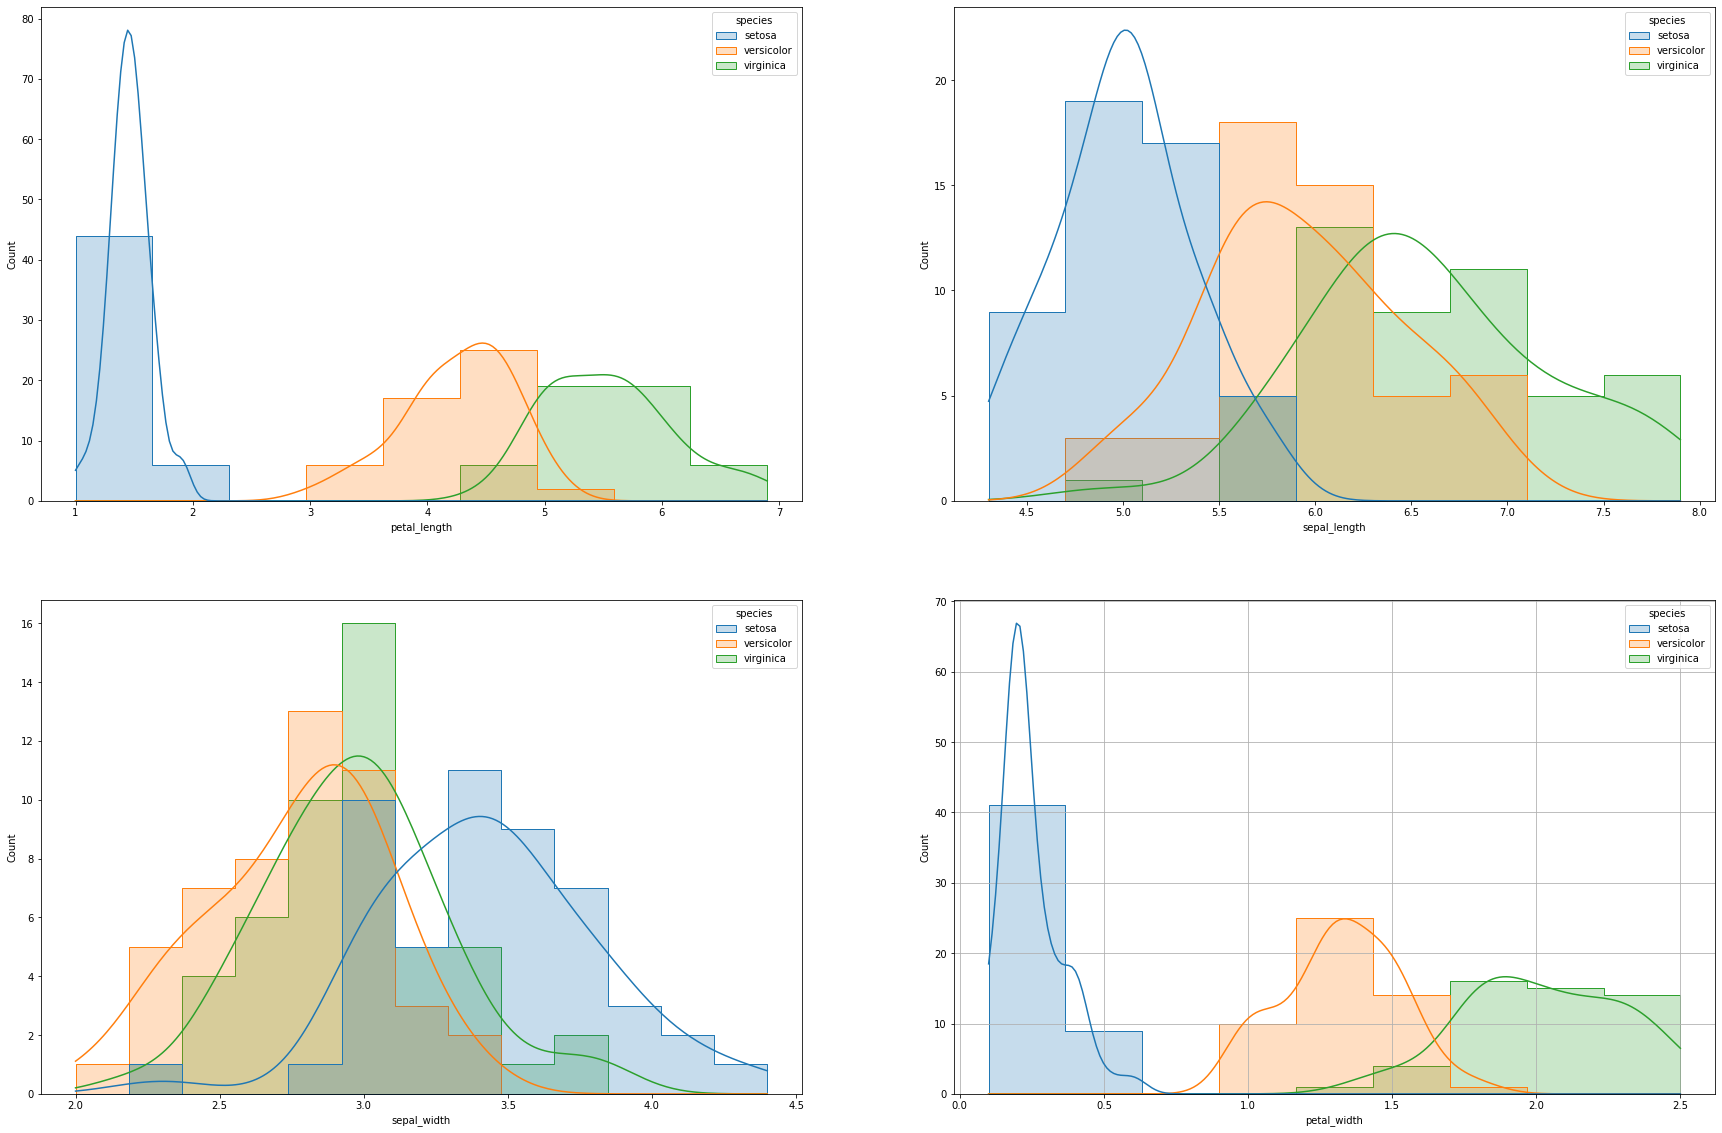

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
sns.histplot(iris_data_plot, x="petal_length", hue="species", kde=True, ax=ax[0,0],element="step")
sns.histplot(iris_data_plot, x="sepal_length", hue="species", kde=True, ax=ax[0,1],element="step")
sns.histplot(iris_data_plot, x="sepal_width", hue="species", kde=True, ax=ax[1,0],element="step")
sns.histplot(iris_data_plot, x="petal_width", hue="species", kde=True, ax=ax[1,1],element="step")
plt.grid()
plt.show()
print()

### Analysis
<ul>
<li>The better seperated the classes are the better the feature is. </li>
<li> Petal length > Petal width > Sepal Length and Sepal Width </li> 
</ul>

### Cumulative Distribution Function

In [19]:
counts_setosa, bin_edges_setosa =np.histogram(iris_setosa['petal_length'], bins=10, density=True)
counts_versicolor, bin_edges_versicolor =np.histogram(iris_versicolor['petal_length'], bins=10, density=True)
counts_verginica, bin_edges_verginica =np.histogram(iris_verginica['petal_length'], bins=10, density=True)

pdf_setosa=counts_setosa/ (sum(counts_setosa))
pdf_versicolor=counts_versicolor/ (sum(counts_versicolor))
pdf_verginica=counts_verginica/ (sum(counts_verginica))

# Compute C.D.F
cdf_setosa=np.cumsum(pdf_setosa)
cdf_versicolor=np.cumsum(pdf_versicolor)
cdf_verginica=np.cumsum(pdf_verginica)

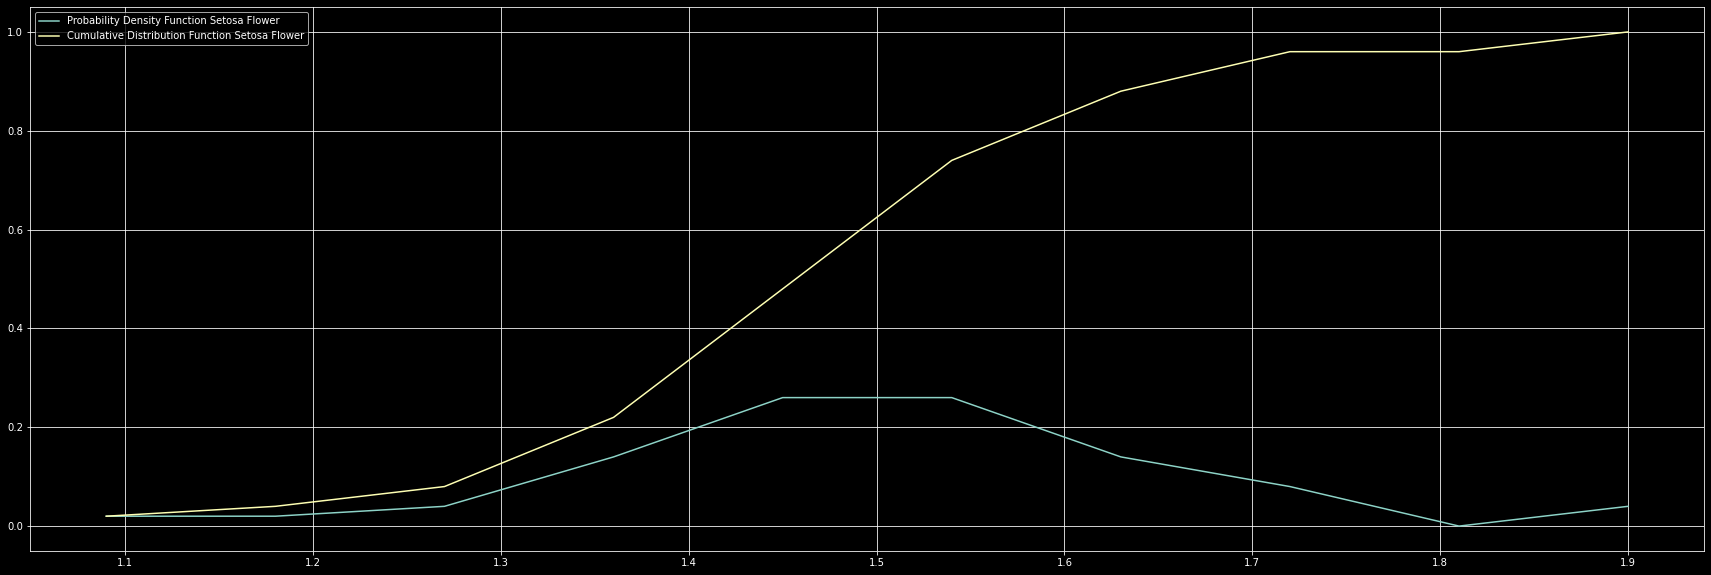

In [20]:
plt.figure(figsize=(30,10))
plt.plot(bin_edges_setosa[1:], pdf_setosa , label="Probability Density Function Setosa Flower")
plt.plot(bin_edges_setosa[1:], cdf_setosa,  label="Cumulative Distribution Function Setosa Flower")
plt.legend()
plt.grid()
plt.show()

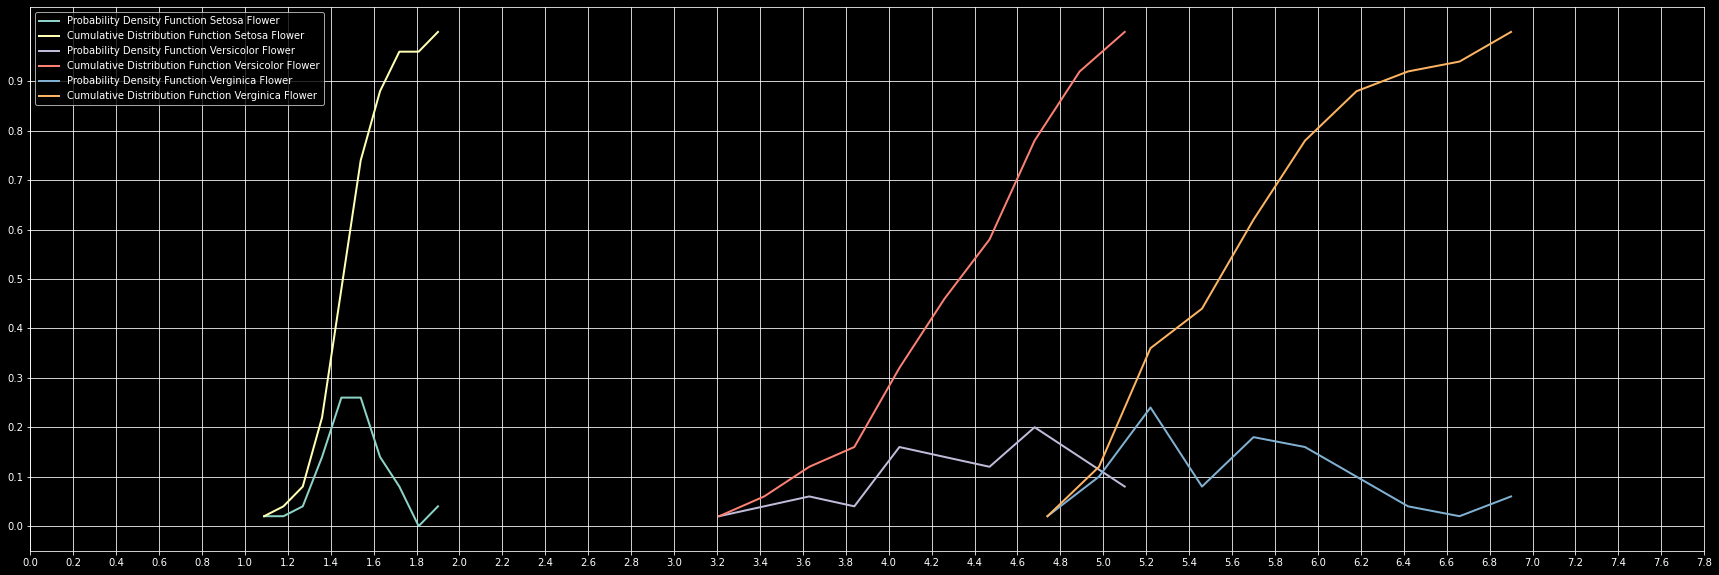

In [21]:
plt.figure(figsize=(30,10))
plt.plot(bin_edges_setosa[1:], pdf_setosa , label="Probability Density Function Setosa Flower",linewidth=2)
plt.plot(bin_edges_setosa[1:], cdf_setosa,  label="Cumulative Distribution Function Setosa Flower",linewidth=2)
plt.plot(bin_edges_versicolor[1:], pdf_versicolor , label="Probability Density Function Versicolor Flower",linewidth=2)
plt.plot(bin_edges_versicolor[1:], cdf_versicolor,  label="Cumulative Distribution Function Versicolor Flower",linewidth=2)
plt.plot(bin_edges_verginica[1:], pdf_verginica , label="Probability Density Function Verginica Flower",linewidth=2)
plt.plot(bin_edges_verginica[1:], cdf_verginica,  label="Cumulative Distribution Function Verginica Flower",linewidth=2)
plt.xticks(np.arange(0, 8, step=0.2))
plt.yticks(np.arange(0, 1, step=0.1)) 
plt.legend()
plt.grid(visible=True)
plt.style.use('dark_background')
plt.show()


In [17]:
counts_setosa, bin_edges_setosa =np.histogram(iris_setosa['petal_width'], bins=10, density=True)
counts_versicolor, bin_edges_versicolor =np.histogram(iris_versicolor['petal_width'], bins=10, density=True)
counts_verginica, bin_edges_verginica =np.histogram(iris_verginica['petal_width'], bins=10, density=True)

pdf_setosa=counts_setosa/ (sum(counts_setosa))
pdf_versicolor=counts_versicolor/ (sum(counts_versicolor))
pdf_verginica=counts_verginica/ (sum(counts_verginica))

# Compute C.D.F
cdf_setosa=np.cumsum(pdf_setosa)
cdf_versicolor=np.cumsum(pdf_versicolor)
cdf_verginica=np.cumsum(pdf_verginica)

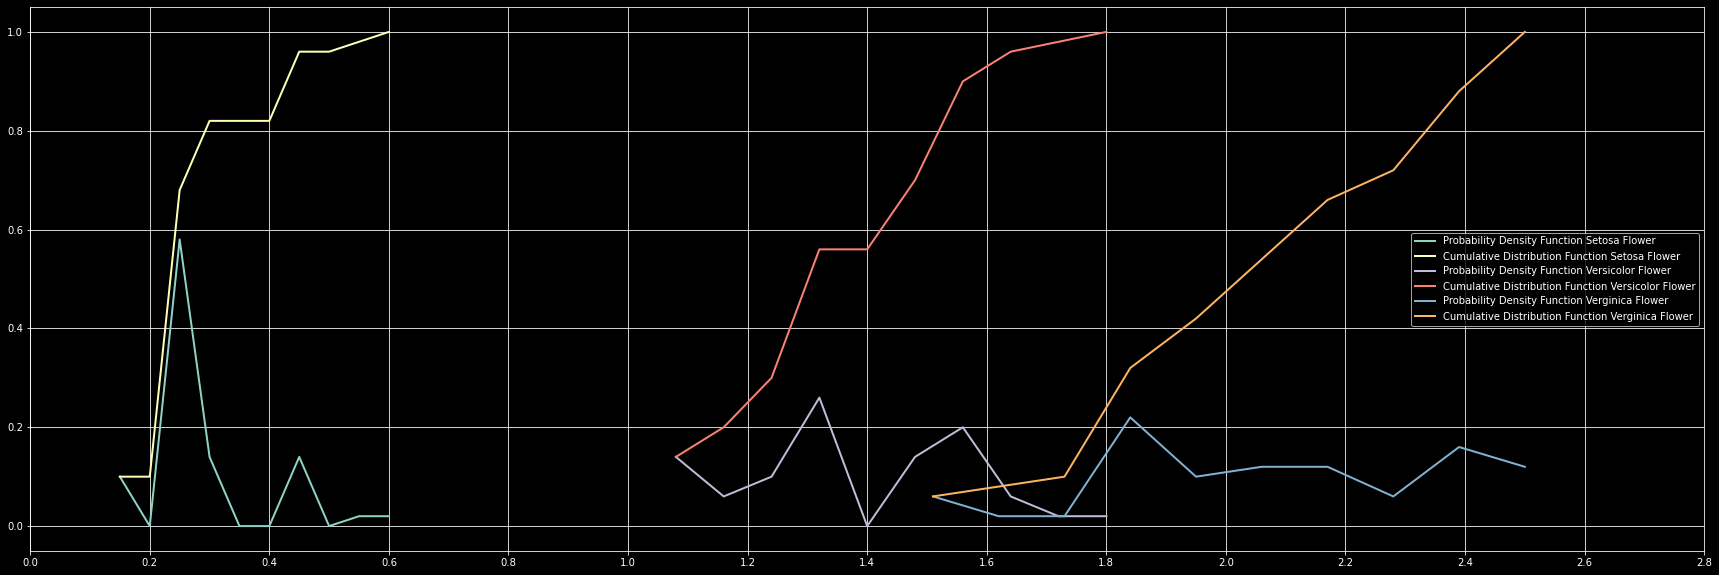

In [18]:
plt.figure(figsize=(30,10))
plt.plot(bin_edges_setosa[1:], pdf_setosa , label="Probability Density Function Setosa Flower",linewidth=2)
plt.plot(bin_edges_setosa[1:], cdf_setosa,  label="Cumulative Distribution Function Setosa Flower",linewidth=2)
plt.plot(bin_edges_versicolor[1:], pdf_versicolor , label="Probability Density Function Versicolor Flower",linewidth=2)
plt.plot(bin_edges_versicolor[1:], cdf_versicolor,  label="Cumulative Distribution Function Versicolor Flower",linewidth=2)
plt.plot(bin_edges_verginica[1:], pdf_verginica , label="Probability Density Function Verginica Flower",linewidth=2)
plt.plot(bin_edges_verginica[1:], cdf_verginica,  label="Cumulative Distribution Function Verginica Flower",linewidth=2)
plt.xticks(np.arange(0, 3, step=0.2))
plt.legend()
plt.grid(visible=True)
plt.style.use('dark_background')
plt.show()